In [25]:
import pandas as pd
import plotly.graph_objects as go
import langid
from neattext.pipeline import TextPipeline
from neattext.functions import remove_html_tags, remove_urls, remove_puncts
from wordcloud import WordCloud

In [26]:
df = pd.read_csv('data_mirror_week_51_2023.csv')

In [27]:
def clean_text(x):
    """This function used neattext functions to clean descriptions, bodys and
    titles"""
    clean_pipe = TextPipeline(
        steps=[
            remove_puncts,
            remove_html_tags,
            remove_urls])

    return clean_pipe.fit(str(x))

In [28]:
def detect_language(x):
    """ Function to detect the language"""
    if x is None:
        return None
    else:
        res = langid.classify(x)
        return res[0]

In [29]:
df['description'] = df['description'].apply(clean_text)
df['lang'] = df['description'].apply(detect_language)

In [36]:
text = " ".join(list(df.title.values))

In [51]:
word_cloud = WordCloud(collocations = False, background_color='rgba(255, 255, 255, 0)', mode="RGBA", width=1000, height=400).generate(text)

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

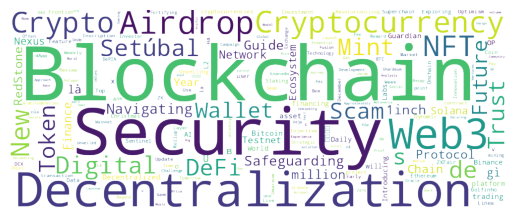

In [53]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [58]:
# Replace 'nan' strings with actual NaN values
df['description'].replace('nan', pd.NA, inplace=True)

# Drop rows with NaN values in the 'description' column
df.dropna(subset=['description'], inplace=True)

In [59]:
df

,platform,title,link,arweave_link,author,description,recipient_wallet,body,date,collections,supply,price,currency,network,revenue,lang
1,mirror,Preparing Optimism for the Superchain future,https://mirror.xyz/0xfF5Ae9b0A7522736299d797D8...,https://arweave.net/sDpVaayoVG1Wj7CpRHDladRxxh...,The Optimism Collective,In a rapidly evolving digital landscape Optimi...,0xfF5Ae9b0A7522736299d797D80b8fc6F31d61100,"In a rapidly evolving digital landscape, Optim...",2023-12-19,305.0,0.0,0.000,NaN,Optimism,0.0,en
2,mirror,ZKFair's Gas Fee Airdrop Community Guide: The ...,https://mirror.xyz/0xA8796EF00165DAA7d6B066bD7...,https://arweave.net/uIPbGQZ7yQFBxiT0NHxjK17P6Y...,ZKFair,This article will comprehensively explain the ...,0xA8796EF00165DAA7d6B066bD77147aA3B7fB91FD,This article will comprehensively explain the ...,2023-12-21,243.0,0.0,0.000,NaN,Optimism,0.0,en
3,mirror,"Auctions: context, types of auctions, what is ...",https://mirror.xyz/0xCbdf5Ed652D49Aae741CC5901...,https://arweave.net/t9llYG94Yc1XEM36Kg4CY5uFnw...,Taiko Labs,This article has been written by Lisa A\n,0x5b796c4B197B6DfD413f177059C27963EB80af0F,*This article has been written by [Lisa A](htt...,2023-12-20,154.0,0.0,0.000,NaN,Optimism,0.0,en
4,mirror,Zora Launches on Layer3,https://mirror.xyz/0x8Bb846922959f209EeB5Dc842...,https://arweave.net/fEmi1xElTo-xr8T1isZa3KoS8D...,Layer3,The Zora Network is a fast costefficient and s...,0x7B0befc5B043148Cd7bD5cFeEEf7BC63D28edEC0,"The Zora Network is a fast, cost-efficient, an...",2023-12-19,145.0,0.0,0.000,NaN,Zora,0.0,en
5,mirror,Sound x Base: Bringing Millions of Music Fans ...,https://mirror.xyz/0x7a55aAe410Ff412F39B023E9B...,https://arweave.net/MYLvWvgcTgde4-eHoyldXh82i5...,sound.xyz,We want to bring millions of people onchain th...,0x7a55aAe410Ff412F39B023E9B5E2E5dBC9a58f68,*We want to bring millions of people onchain t...,2023-12-19,115.0,0.0,0.000,NaN,Optimism,0.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,mirror,NFTScan Labs,https://mirror.xyz/0x345326a63D3fb4428d02De264...,https://arweave.net/4N8ZFt74laMa3GT76NXrSUFKF3...,0x3453…78D0,В постоянно развивающемся мире блокчейнтехноло...,0x345326a63D3fb4428d02De264f2b45f6889e78D0,В постоянно развивающемся мире блокчейн-технол...,2023-12-23,0.0,0.0,0.000,NaN,Optimism,0.0,ru
1447,mirror,The Smurfs: A Beloved Classic of Children's En...,https://mirror.xyz/0x69752bF6A2f0c3A6e65F75762...,https://arweave.net/Xg8IVahjjiaE9EBUo00KdQEQpA...,Stavath,The Smurfs are a beloved classic of childrens ...,0x69752bF6A2f0c3A6e65F75762aBdDB12b8713EE2,The Smurfs are a beloved classic of children's...,2023-12-23,0.0,0.0,0.001,ETH,Optimism,0.0,en
1448,mirror,Mint Blockchain: революция в создании цифровых...,https://mirror.xyz/0xb39bd4A05FFbCAFB3BFdA1b2E...,https://arweave.net/oQZmxGKIcpv_rTz09WgP4PoCYI...,0xb39b…3E5d,Mint Blockchain: переворот в сфере создания ци...,0xb39bd4A05FFbCAFB3BFdA1b2E821072cC8e93E5d,Mint Blockchain: переворот в сфере создания ци...,2023-12-23,0.0,0.0,0.000,NaN,Optimism,0.0,ru
1463,mirror,Taiko Airdop,https://mirror.xyz/0xc9d4D6Ca8018A5bA86c7613E9...,https://arweave.net/8JgztA-5TYu4gA5e83RmaART1m...,0xc9d4…6a6D,In just 10 minutes you can seize a lifechangin...,0xc9d4D6Ca8018A5bA86c7613E91a05d07C9196a6D,"In just 10 minutes, you can seize a life-chang...",2023-12-19,NaN,NaN,0.000,NaN,NaN,NaN,en
